In [1]:
# import the necessary packages
import pandas as pd
import numpy as np 
import tensorflow as tf 
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras. applications.inception_resnet_v2 import InceptionResNetV2 
from tensorflow. keras. layers import *
from tensorflow.keras.models import Model, load_model 
from tensorflow.keras. initializers import glorot_uniform 
from tensorflow. keras.utils import plot_model 
from IPython.display import display 
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler 
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks = True, grid= False)

C:\Users\thieu\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%cd "D:\NCKH"


D:\NCKH


In [28]:
os.listdir('./train')

['Bangus',
 'Big Head Carp',
 'Black Spotted Barb',
 'Fourfinger Threadfin',
 'Glass Perchlet',
 'Gold Fish',
 'Gourami',
 'Green Spotted Puffer',
 'Jaguar Gapote',
 'Knifefish',
 'Long-Snouted Pipefish',
 'Mosquito Fish',
 'Mullet',
 'Pangasius',
 'Scat Fish',
 'Silver Barb',
 'Silver Perch',
 'Snakehead',
 'Tenpounder',
 'Tilapia']

In [29]:
os.listdir('./val')

['Bangus',
 'Big Head Carp',
 'Black Spotted Barb',
 'Fourfinger Threadfin',
 'Glass Perchlet',
 'Gold Fish',
 'Gourami',
 'Green Spotted Puffer',
 'Jaguar Gapote',
 'Knifefish',
 'Long-Snouted Pipefish',
 'Mosquito Fish',
 'Mullet',
 'Pangasius',
 'Scat Fish',
 'Silver Barb',
 'Silver Perch',
 'Snakehead',
 'Tenpounder',
 'Tilapia']

In [3]:
#Check the number of images in training, validation and evaluation dataset
train=[]
val=[]
test=[]
# os.listdir returns the list of files in the folder, in this case image class name
for i in os.listdir('./train'):
    train.extend(os.listdir(os.path.join('train',i)))
    val.extend(os.listdir(os.path.join('val',i)))
    test.extend(os.listdir(os.path.join('test',i)))
print('Number of train images: {}\n Number of validation images: {}\nNumber of test images: {}'.format(len(train),len(val),len(test)))

Number of train images: 9558
 Number of validation images: 2969
Number of test images: 960


In [31]:
train

['Bangus 1.jpg',
 'Bangus 10.jpg',
 'Bangus 100.jpg',
 'Bangus 101.jpg',
 'Bangus 102.jpg',
 'Bangus 103.jpg',
 'Bangus 105.jpg',
 'Bangus 106.jpg',
 'Bangus 107.jpg',
 'Bangus 108.jpg',
 'Bangus 109.jpg',
 'Bangus 11.jpg',
 'Bangus 110.jpg',
 'Bangus 111.jpg',
 'Bangus 112.jpg',
 'Bangus 113.jpg',
 'Bangus 114.jpg',
 'Bangus 115.jpg',
 'Bangus 116.jpg',
 'Bangus 117.jpg',
 'Bangus 118.jpg',
 'Bangus 119.jpg',
 'Bangus 12.jpg',
 'Bangus 120.jpg',
 'Bangus 121.jpg',
 'Bangus 122.jpg',
 'Bangus 123.jpg',
 'Bangus 124.jpg',
 'Bangus 125.jpg',
 'Bangus 126.jpg',
 'Bangus 127.jpg',
 'Bangus 128.jpg',
 'Bangus 129.jpg',
 'Bangus 13.jpg',
 'Bangus 130.jpg',
 'Bangus 131.jpg',
 'Bangus 132.jpg',
 'Bangus 133.jpg',
 'Bangus 134.jpg',
 'Bangus 135.jpg',
 'Bangus 136.jpg',
 'Bangus 137.jpg',
 'Bangus 138.jpg',
 'Bangus 139.jpg',
 'Bangus 14.jpg',
 'Bangus 140.jpg',
 'Bangus 141.jpg',
 'Bangus 142.jpg',
 'Bangus 143.jpg',
 'Bangus 144.jpg',
 'Bangus 145.jpg',
 'Bangus 146.jpg',
 'Bangus 147.jpg',


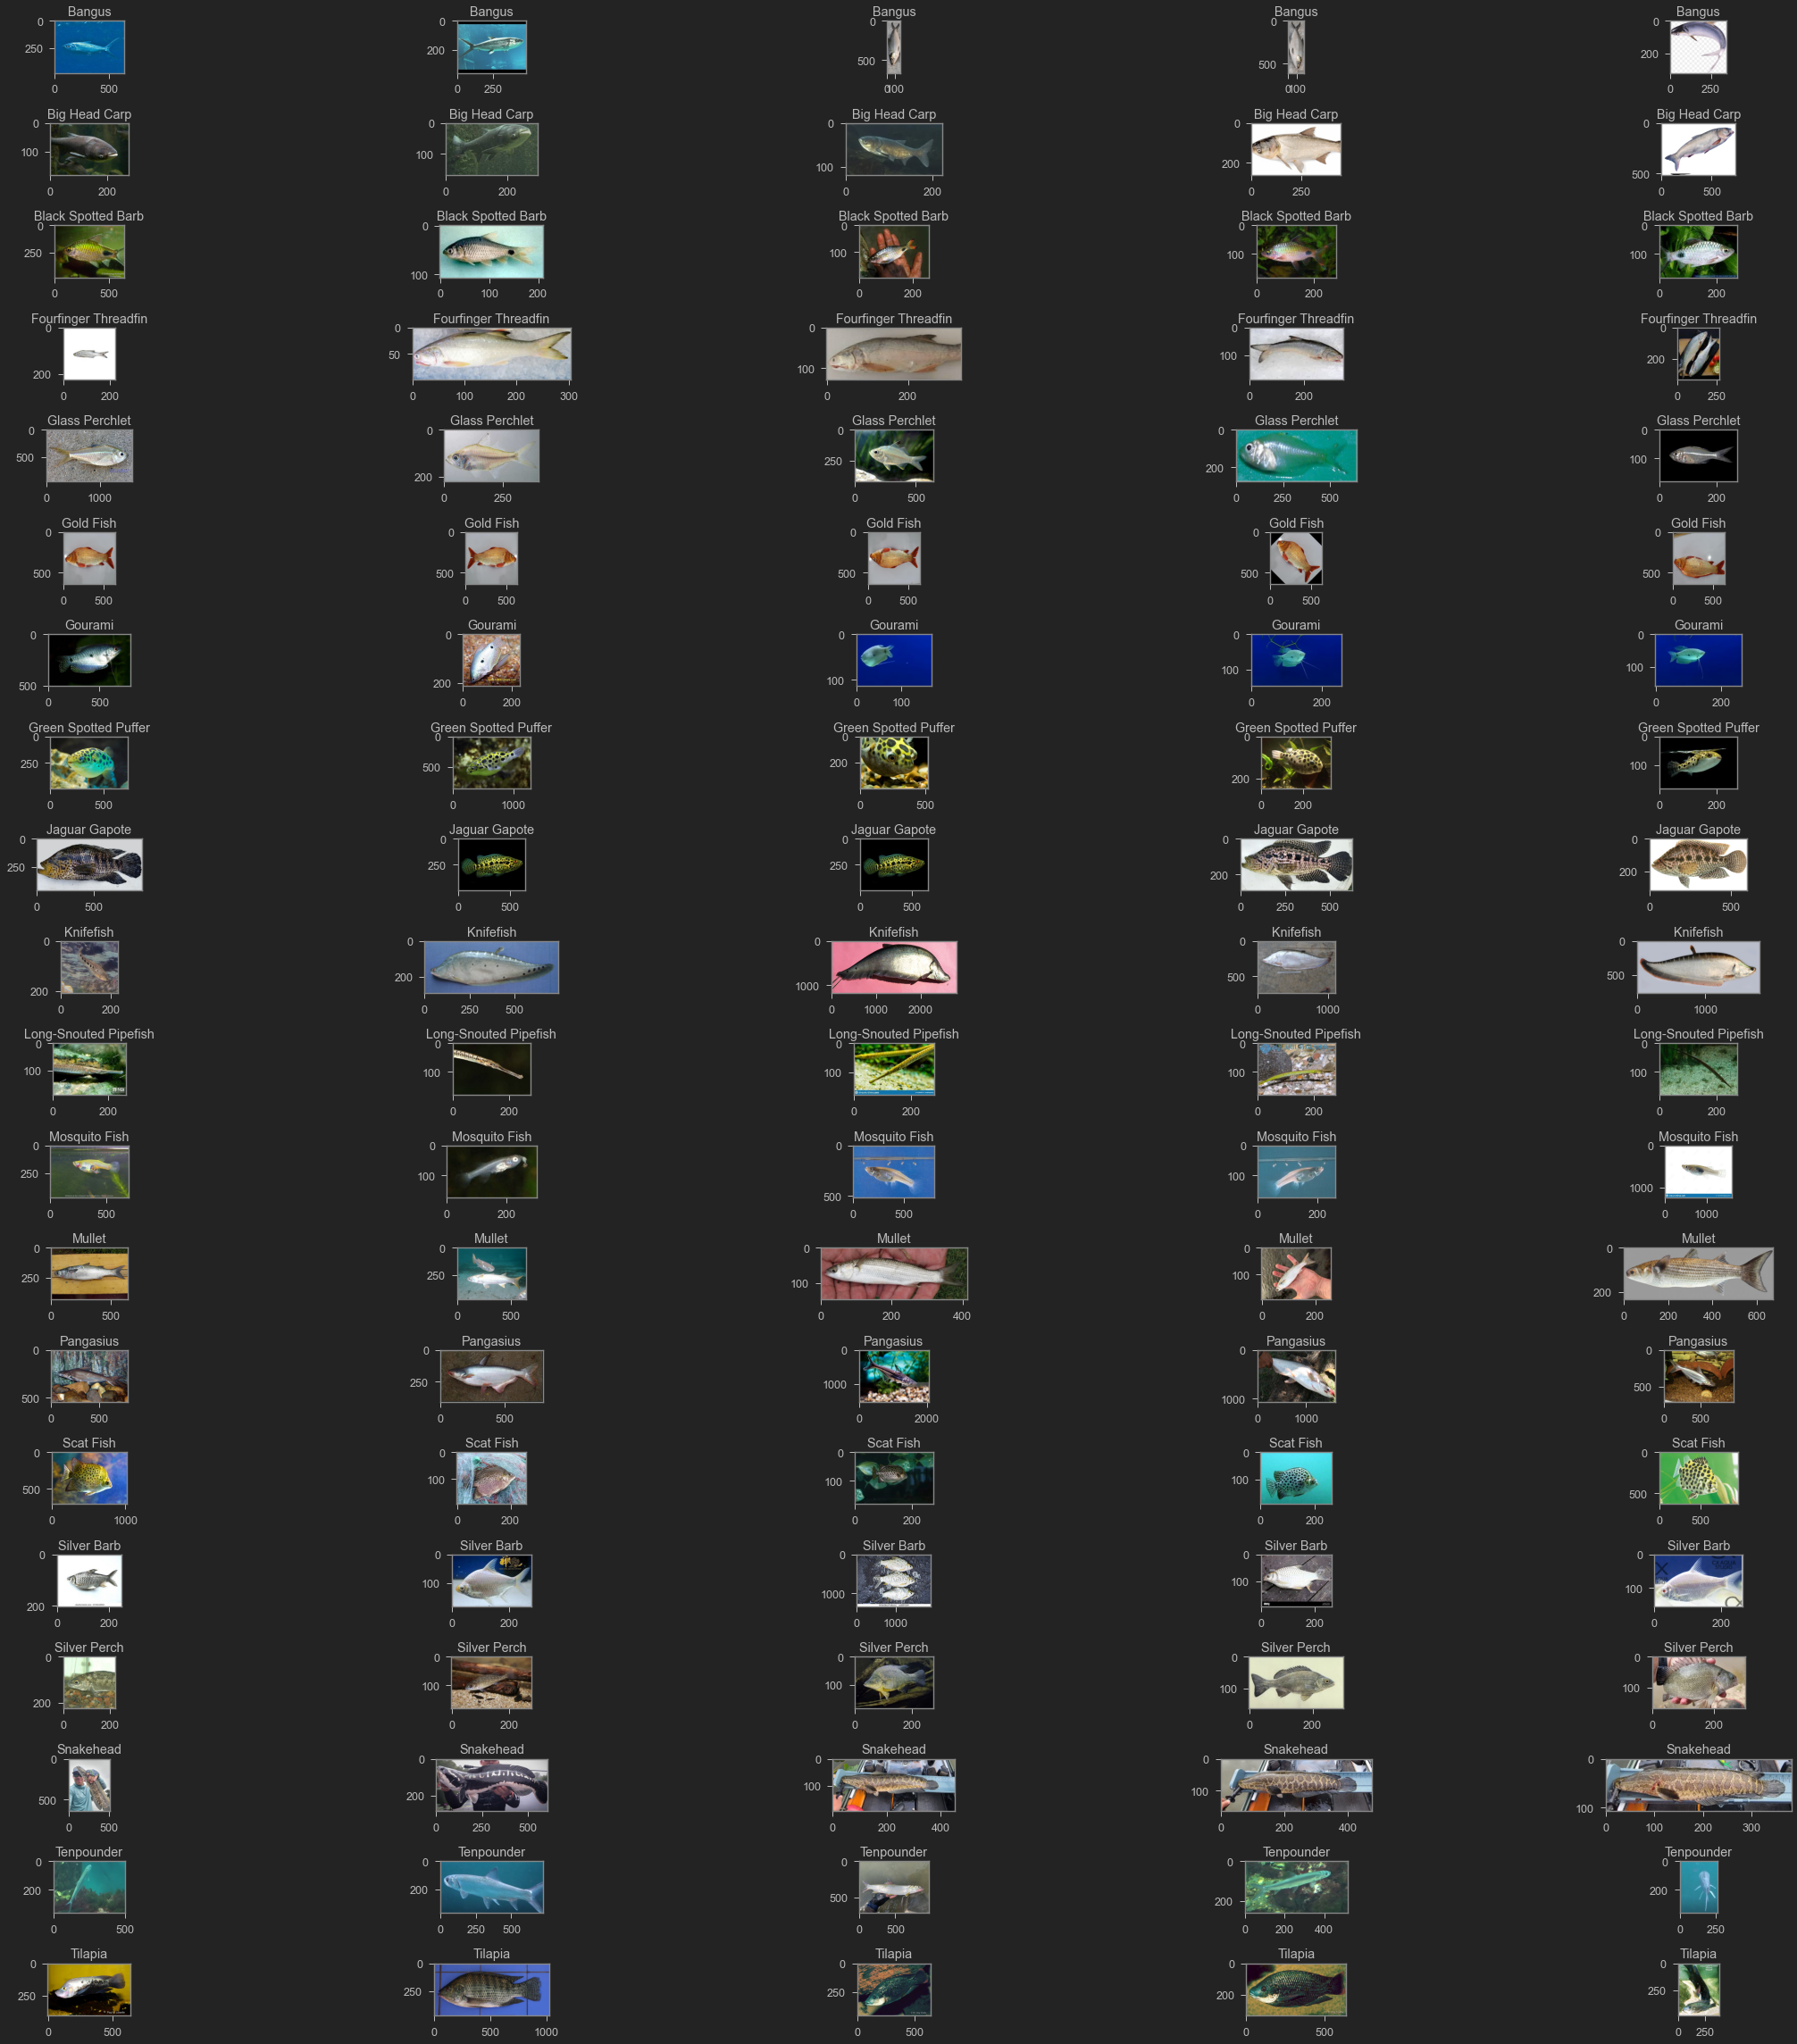

In [32]:
# Visualize the images in the dataset

fig, axs = plt.subplots(20, 5, figsize = (32,32)) # 25:5 matrix (25 classes, 5 columns)
count = 0
# for every class in the dataset
for i in os.listdir('./train'):
  # get the list of all images that belong to a particular class
  train_class = os.listdir(os.path.join('train', i))
  
  # plot 1 images per class
  for j in range(5):
    img = os.path.join('train', i, train_class[j])
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(PIL.Image.open(img))  
  count += 1

fig.tight_layout()

In [33]:
# check the number of images in each class in the training dataset

No_images_per_class = []
Class_name = []
for i in os.listdir('./train'):
  Class_name.append(i)
  train_class = os.listdir(os.path.join('train',i))
  print('Number of images in {}={}\n'.format(i,len(train_class)))
  No_images_per_class.append(len(train_class))

Number of images in Bangus=342

Number of images in Big Head Carp=402

Number of images in Black Spotted Barb=400

Number of images in Fourfinger Threadfin=383

Number of images in Glass Perchlet=700

Number of images in Gold Fish=407

Number of images in Gourami=623

Number of images in Green Spotted Puffer=220

Number of images in Jaguar Gapote=458

Number of images in Knifefish=638

Number of images in Long-Snouted Pipefish=512

Number of images in Mosquito Fish=510

Number of images in Mullet=522

Number of images in Pangasius=386

Number of images in Scat Fish=308

Number of images in Silver Barb=658

Number of images in Silver Perch=553

Number of images in Snakehead=464

Number of images in Tenpounder=554

Number of images in Tilapia=518



In [34]:
No_images_per_class

[342,
 402,
 400,
 383,
 700,
 407,
 623,
 220,
 458,
 638,
 512,
 510,
 522,
 386,
 308,
 658,
 553,
 464,
 554,
 518]

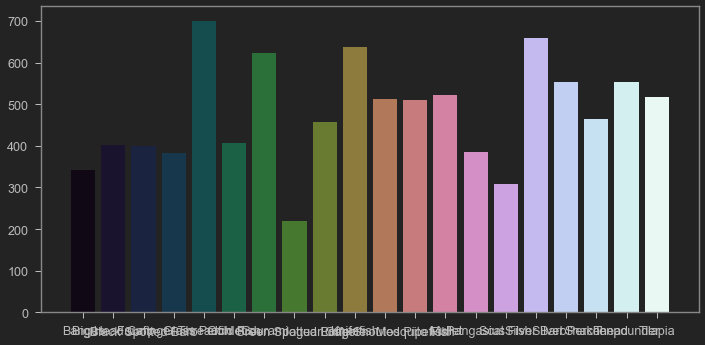

In [35]:
# visualize the number of images in each class in the training dataset

fig = plt.figure(figsize=(10,5))
plt.bar(Class_name, No_images_per_class, color = sns.color_palette("cubehelix",len(Class_name)))
fig.tight_layout()

Perform image augmentation and create data generator


In [5]:
train_datagen=ImageDataGenerator(
              rescale = 1./255,
              shear_range =0.2,
              zoom_range=0.2,
              horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Create data generator for training, validation and test dataset.
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
val_generator = test_datagen.flow_from_directory(
        'val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 9542 images belonging to 20 classes.
Found 2969 images belonging to 20 classes.
Found 959 images belonging to 20 classes.


Build deep learning model using resnetv2

In [38]:
#basemodel =InceptionResNetV2(weights ='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))
#chay lai bang VGG16
from tensorflow.keras.applications.vgg16 import VGG16
vgg16 = VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3) )

In [39]:
#basemodel.summary()
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [40]:
#basemodel.trainable= False
#dong bang full
for layer in vgg16.layers[:]:
        layer.trainable = False  

In [41]:
for idx, layer in enumerate(vgg16.layers):
    print(f' {idx}:  {layer.name}: trainable = {layer.trainable}')

 0:  input_2: trainable = False
 1:  block1_conv1: trainable = False
 2:  block1_conv2: trainable = False
 3:  block1_pool: trainable = False
 4:  block2_conv1: trainable = False
 5:  block2_conv2: trainable = False
 6:  block2_pool: trainable = False
 7:  block3_conv1: trainable = False
 8:  block3_conv2: trainable = False
 9:  block3_conv3: trainable = False
 10:  block3_pool: trainable = False
 11:  block4_conv1: trainable = False
 12:  block4_conv2: trainable = False
 13:  block4_conv3: trainable = False
 14:  block4_pool: trainable = False
 15:  block5_conv1: trainable = False
 16:  block5_conv2: trainable = False
 17:  block5_conv3: trainable = False
 18:  block5_pool: trainable = False


In [42]:
layer_output_1 = vgg16.output

In [43]:
from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input,Flatten, Dropout,GlobalMaxPooling2D,Lambda
from tensorflow.keras.models import Model
x = Flatten()(layer_output_1)
x = Dense(4096,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1072,activation='relu')(x)
x = Dropout(0.2)(x)
y = Dense(20, activation='softmax')(x)

model = Model(inputs=vgg16.inputs, outputs=y)

In [44]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Compile

In [45]:
model.compile(loss ='categorical_crossentropy',optimizer = 'SGD', metrics = ['accuracy'])

In [46]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="khgblock.hdf5", verbose=1, save_best_only=True)

In [47]:
history = model.fit(train_generator, 
                    steps_per_epoch= train_generator.n // 32 , 
                    epochs = 10, 
                    validation_data= val_generator, 
                    validation_steps= val_generator.n // 32 , 
                    callbacks=[checkpointer, earlystopping])

Epoch 1/10
298/298 [==============================] - ETA: 0s - loss: 2.6854 - accuracy: 0.1880
Epoch 1: val_loss improved from inf to 2.28486, saving model to khgblock.hdf5
298/298 [==============================] - 1854s 6s/step - loss: 2.6854 - accuracy: 0.1880 - val_loss: 2.2849 - val_accuracy: 0.3234
Epoch 2/10
298/298 [==============================] - ETA: 0s - loss: 2.0288 - accuracy: 0.3675
Epoch 2: val_loss improved from 2.28486 to 1.94616, saving model to khgblock.hdf5
298/298 [==============================] - 1828s 6s/step - loss: 2.0288 - accuracy: 0.3675 - val_loss: 1.9462 - val_accuracy: 0.4188
Epoch 3/10
298/298 [==============================] - ETA: 0s - loss: 1.7286 - accuracy: 0.4599
Epoch 3: val_loss improved from 1.94616 to 1.54408, saving model to khgblock.hdf5
298/298 [==============================] - 1836s 6s/step - loss: 1.7286 - accuracy: 0.4599 - val_loss: 1.5441 - val_accuracy: 0.5071
Epoch 4/10
298/298 [==============================] - ETA: 0s - loss: 1

In [7]:
import tensorflow.keras as K
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
model = load_model("D:/NCKH/khgblock.hdf5",compile=False) 
#model.load_weights('khgblock.hdf5')

In [49]:
evaluate_train = model.evaluate_generator(train_generator, steps = train_generator.n // 32, verbose =1)
evaluate_val = model.evaluate_generator(val_generator, steps = val_generator.n // 32, verbose =1)
evaluate_test = model.evaluate_generator(test_generator, steps = test_generator.n // 32, verbose =1)
print('Accuracy Train : {}'.format(evaluate_train[1]))
print('Accuracy Val : {}'.format(evaluate_val[1]))
print('Accuracy Test : {}'.format(evaluate_test[1]))

C:\Users\thieu\AppData\Local\Temp\ipykernel_9336\2202045157.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate_train = model.evaluate_generator(train_generator, steps = train_generator.n // 32, verbose =1)


298/298 [==============================] - 731s 2s/step - loss: 0.9162 - accuracy: 0.7131


C:\Users\thieu\AppData\Local\Temp\ipykernel_9336\2202045157.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate_val = model.evaluate_generator(val_generator, steps = val_generator.n // 32, verbose =1)


92/92 [==============================] - 210s 2s/step - loss: 0.9250 - accuracy: 0.7306


C:\Users\thieu\AppData\Local\Temp\ipykernel_9336\2202045157.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate_test = model.evaluate_generator(test_generator, steps = test_generator.n // 32, verbose =1)


29/29 [==============================] - 68s 2s/step - loss: 0.7824 - accuracy: 0.7629
Accuracy Train : 0.713087260723114
Accuracy Val : 0.7306385636329651
Accuracy Test : 0.7629310488700867


In [8]:
labels=['Bangus',
 'Big Head Carp',
 'Black Spotted Barb',
 'Fourfinger Threadfin',
 'Glass Perchlet',
 'Gold Fish',
 'Gourami',
 'Green Spotted Puffer',
 'Jaguar Gapote',
 'Knifefish',
 'Long-Snouted Pipefish',
 'Mosquito Fish',
 'Mullet',
 'Pangasius',
 'Scat Fish',
 'Silver Barb',
 'Silver Perch',
 'Snakehead',
 'Tenpounder',
 'Tilapia']

In [9]:
import cv2
# loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0
for i in os.listdir('./test'):
    for item in os.listdir(os.path.join('./test',i)):
        #code to open the image
        img = cv2.imread(os.path.join('./test',i,item))
        #resizing the image to (224,224)
        img = cv2.resize(img, (224, 224))
        #converting image to array
        img = np.asarray(img, dtype=np.float32)
        #normalizing the image
        img = img / 255
        #reshaping the image into a 4D array
        img = img.reshape(-1, 224, 224, 3)
        #making prediction of the model
        predict = model.predict(img)
        #getting the index corresponding to the highest value in the prediction
        predict = np.argmax(predict)
        #appending the predicted class to the list
        prediction.append(labels[predict])
        #appending original class to the list
        original.append(i)


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 120ms/step


1/1 [==============================] - 0s 116ms/step


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [51]:
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
# Load and preprocess the new image for prediction
img_path = "C:/Users/thieu/Downloads/ti.jpg"

img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)  # Normalize and preprocess the image

In [52]:
# Get the predictions for the new image
predictions = model.predict(x)
# predictions is a numpy array of shape (1, num_classes) with predicted class probabilities


1/1 [==============================] - 0s 498ms/step


In [53]:
# Convert predicted probabilities to class labels
predicted_class_indices = np.argmax(predictions, axis=1)
# predicted_class_indices is a numpy array of shape (1,) with predicted class indices


In [54]:
# Map class indices to class labels
class_labels = train_generator.class_indices
inv_class_labels = {v: k for k, v in class_labels.items()}
predicted_classes = [inv_class_labels[idx] for idx in predicted_class_indices]
# predicted_classes is a list of predicted class labels


In [55]:
print("Predicted class: ", predicted_classes[0])

Predicted class:  Jaguar Gapote


In [60]:
# visualizing the results
import random
fig=plt.figure(figsize = (15,15))

for i in range(1, 21):
    j = random.randint(0, len(image)-1)
    fig.add_subplot(20, 1, i)
    plt.xlabel("Prediction - " + prediction[j] + "   Original - " + original[j])
    plt.imshow(np.asarray(image[j]))
fig.tight_layout()
plt.show()


ValueError: empty range for randrange() (0, 0, 0)

<Figure size 1080x1080 with 0 Axes>

In [10]:
print(classification_report(np.asarray(original), np.array(prediction), digits=4))


                       precision    recall  f1-score   support

               Bangus     0.4200    0.6176    0.5000        34
        Big Head Carp     0.9000    0.4186    0.5714        43
   Black Spotted Barb     0.8667    0.3250    0.4727        40
 Fourfinger Threadfin     0.6875    0.5789    0.6286        38
       Glass Perchlet     0.5455    0.9351    0.6890        77
            Gold Fish     0.5538    0.8780    0.6792        41
              Gourami     0.9825    0.8889    0.9333        63
 Green Spotted Puffer     0.9545    0.9545    0.9545        22
        Jaguar Gapote     0.9474    0.8182    0.8780        44
            Knifefish     0.8750    0.8615    0.8682        65
Long-Snouted Pipefish     0.9302    0.7692    0.8421        52
        Mosquito Fish     0.7451    0.7451    0.7451        51
               Mullet     1.0000    0.3947    0.5660        38
            Pangasius     0.9310    0.7105    0.8060        38
            Scat Fish     0.9167    1.0000    0.9565  

Text(0.5, 1.0, 'Confusion_matrix')

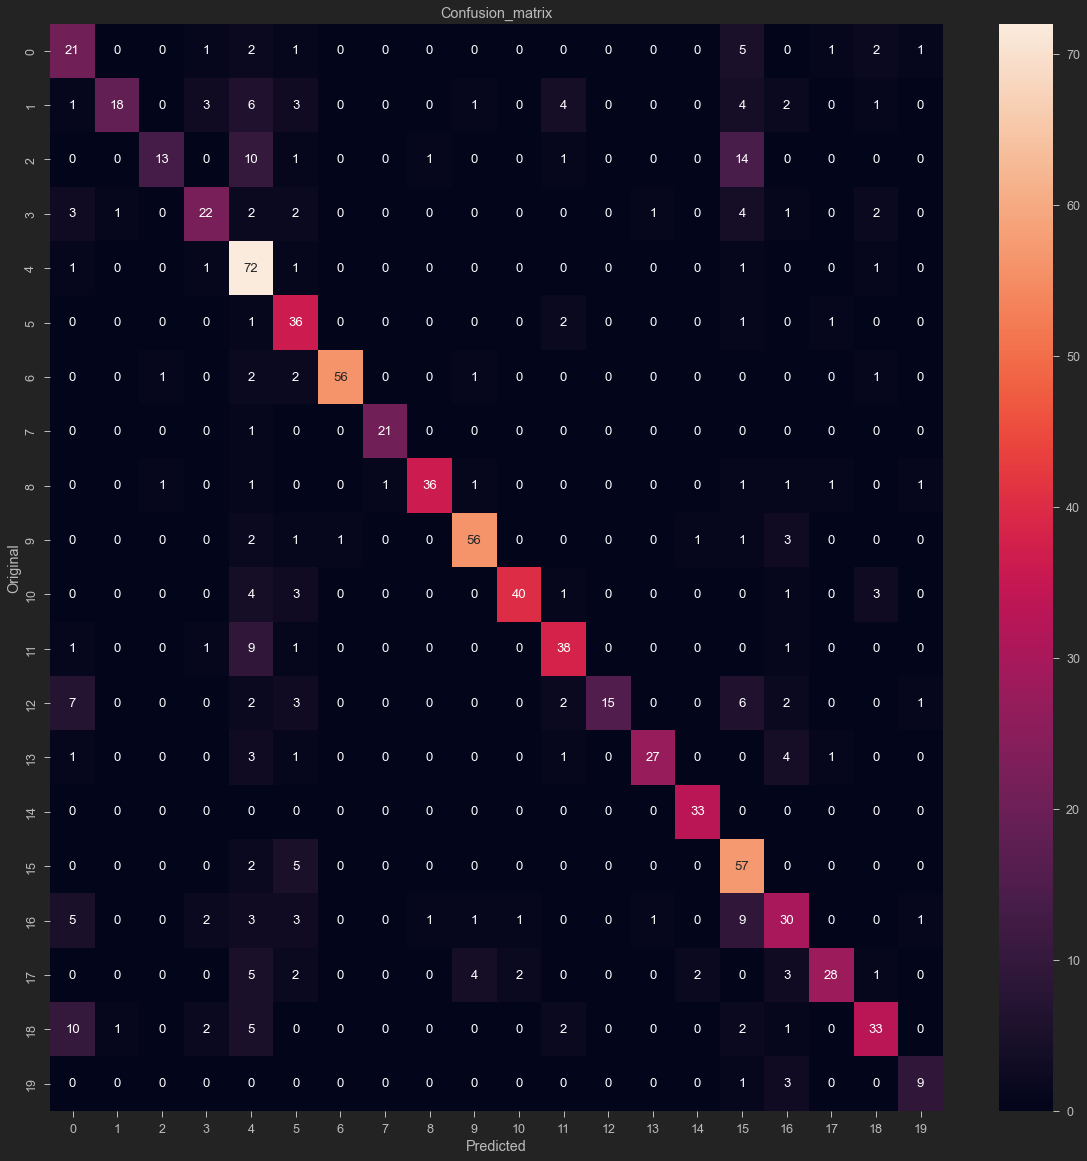

In [59]:
# plot confusion matrix

plt.figure(figsize=(20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')
